<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Matemática e Estatística Aplicada Para Data Science, Machine Learning e IA</font>
## <font color='blue'>Lab 5</font>
### <font color='blue'>Operações com Matrizes, Determinantes, Autovalores e Autovetores em Ciência de Dados</font>

# PCA - Análise de Componentes Principais (PCA) ALGORITMO DE REDUÇÃO DA DIMENSIONALIDADE

## Instalando e Carregando os Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [2]:
# Imports
import numpy as np

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" 

Author: Data Science Academy



## Autovalores e Autovetores: FOMAS DE ENCONTRAR PADRÕES EM MATRIZES.

'''Os autovetores indicam direções especiais no espaço onde a matriz 𝐴 age apenas como um alongamento ou encolhimento.
Os autovalores determinam o fator de escala desse alongamento ou encolhimento.'''

Seja A uma matriz n x n. Um escalar λ é chamado de autovalor de A se existe um vetor x diferente de zero que satisfaz a seguinte equação:

Ax = λx

O vetor x é chamado de autovetor de A correspondente a λ.

Em numpy, autovalores e autovetores podem ser calculados simultaneamente usando a função eig().

In [4]:
a = np.array([[2, 2, 1], [1, 3, 1], [1, 2, 2]])

In [5]:
# w - AUTOVALORES (λ)
# v - AUTOVETORES (X)
w, v = np.linalg.eig(a)

In [6]:
print("Eigenvalues (Autovalores):")
print(w)

Eigenvalues (Autovalores):
[5. 1. 1.]


In [7]:
print("Eigenvectors (Autovetores):")
print(v)

Eigenvectors (Autovetores):
[[-0.57735027 -0.90453403  0.82529864]
 [-0.57735027  0.30151134 -0.52125218]
 [-0.57735027  0.30151134  0.21720572]]


In [8]:
x = np.array([[2, 1],[1,2]])
# u - AUTOVALORES (λ)
# w - AUTOVETORES (X)
u, y = np.linalg.eig(x)
print("Eigenvalues (Autovalores):")
print(u)
print("Eigenvectors (Autovetores):")
print(y)

Eigenvalues (Autovalores):
[3. 1.]
Eigenvectors (Autovetores):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [12]:
### Normalização dos Autovetores:O NumPy sempre normaliza os autovetores para que tenham norma 1.

O produto dos autovalores (5 x 1 x 1 = 5) é igual ao determinante (5) da mesma matriz!

Autovalores e autovetores são extremamente úteis na Análise de Componentes Principais (PCA). No PCA, os autovetores da matriz de correlação ou covariância representam os componentes principais (as direções de variância máxima) e os autovalores correspondentes representam a quantidade de variação explicada por cada componente principal. 

Vamos criar uma matriz 3x3 e realizar os seguintes passos:

- Calcular os autovalores e autovetores da matriz.
- Verificar a propriedade Av=λv, onde A é a matriz, v é um autovetor e λ é o autovalor correspondente.
- Mostrar como uma matriz pode ser aproximada usando apenas um dos seus autovetores e autovalores (essencial em PCA, por exemplo).

In [13]:
# Definindo uma matriz 3x3 
dsa_matriz = np.array([[2, 0, 0], [0, 3, 4], [0, 4, 9]])

In [14]:
dsa_matriz

array([[2, 0, 0],
       [0, 3, 4],
       [0, 4, 9]])

In [15]:
dsa_matriz.shape

(3, 3)

In [16]:
# Calculando autovalores e autovetores
autovalores_B, autovetores_B = np.linalg.eig(dsa_matriz)

In [17]:
# Verificando a propriedade A*v = lambda*v para cada par de autovalor e autovetor
verificacao = [np.allclose(dsa_matriz @ autovetores_B[:, i], autovalores_B[i] * autovetores_B[:, i]) for i in range(len(autovalores_B))]


In [18]:
# Aproximação da matriz usando apenas um autovetor e autovalor
# Aqui, usaremos o primeiro autovalor e autovetor
aproximacao = np.outer(autovetores_B[:, 0], autovetores_B[:, 0]) * autovalores_B[0]

In [19]:
autovalores_B

array([11.,  1.,  2.])

In [20]:
autovetores_B

array([[ 0.        ,  0.        ,  1.        ],
       [ 0.4472136 ,  0.89442719,  0.        ],
       [ 0.89442719, -0.4472136 ,  0.        ]])

In [21]:
verificacao

[True, True, True]

In [22]:
aproximacao

array([[0. , 0. , 0. ],
       [0. , 2.2, 4.4],
       [0. , 4.4, 8.8]])

## Redução de Dimensionalidade com PCA Usando Autovalores e Autovetores

Para criar um exemplo em Python que aplica a Análise de Componentes Principais (PCA) com cálculos de autovalores e autovetores, seguiremos os seguintes passos:

- Gerar um conjunto de dados com 3 variáveis.
- Calcular a matriz de covariância.
- Calcular os autovalores e autovetores da matriz de covariância.
- Selecionar os principais componentes.
- Transformar os dados para o novo espaço de componentes principais.
- Plotar os dados originais em 3D e os dados transformados em 2D.

In [23]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [24]:
# Passo 1: Gerar um conjunto de dados com 3 variáveis
np.random.seed(0)
X = np.random.randn(100, 3)

In [25]:
# Imprimindo as 5 primeiras linhas dos dados
X[0:5]

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721, -0.10321885],
       [ 0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323]])

In [26]:
# Passo 2: Calcular a matriz de covariância
# Como as variáveis variam JUNTAS
cov_matrix = np.cov(X.T)

A matriz de covariância fornece uma medida do grau de variação conjunta de duas ou mais variáveis aleatórias. Se você tiver um conjunto de dados com diversas variáveis, a matriz de covariância ajuda a entender como essas variáveis variam juntas. 

In [27]:
cov_matrix

array([[ 1.06337985, -0.07561529,  0.11267373],
       [-0.07561529,  0.97411743, -0.02219818],
       [ 0.11267373, -0.02219818,  0.96216674]])

In [28]:
# Passo 3: Calcular os autovalores e autovetores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [29]:
# Passo 4: Ordenar os autovetores com base nos autovalores e selecionar os componentes principais
# Ordenar os autovalores em ordem decrescente
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

In [30]:
# Selecionar os 2 componentes principais
principal_components = eigenvectors[:, :2]

In [31]:
# Passo 5: Transformar os dados
X_transformed = X.dot(principal_components)

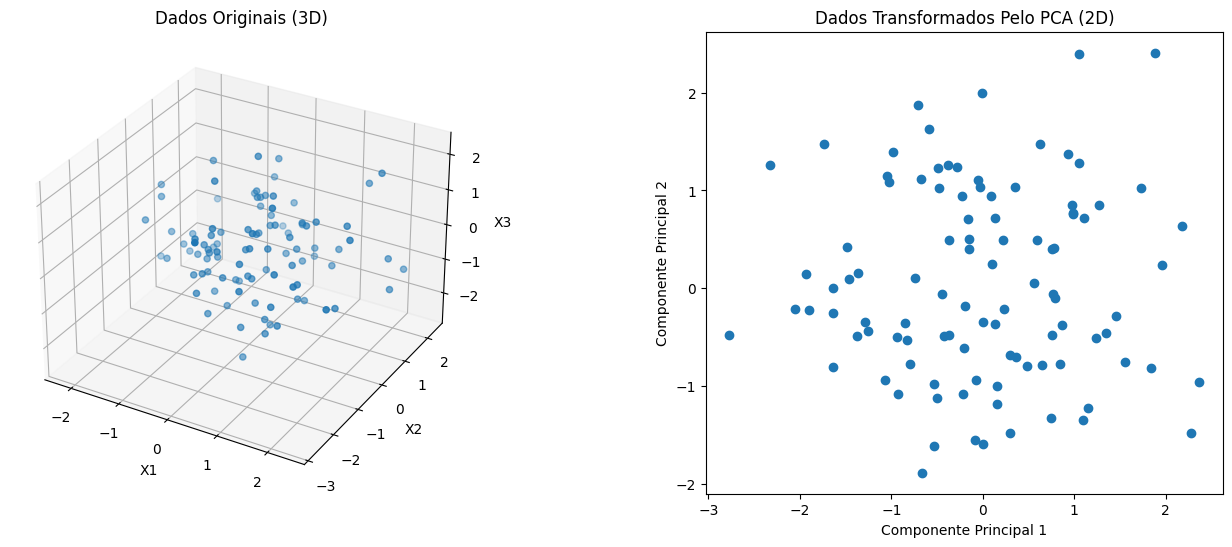

In [32]:
# Passo 6: Plotar os dados originais em 3D e os dados transformados em 2D

# Tamanho da figura
fig = plt.figure(figsize = (16, 6))

# Ajusta o espaçamento entre os gráficos
plt.subplots_adjust(wspace = 0.4)

# Plotando os dados originais em 3D
ax1 = fig.add_subplot(121, projection = '3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2])
ax1.set_title("Dados Originais (3D)")
ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.set_zlabel("X3")

# Plotando os dados transformados em 2D
ax2 = fig.add_subplot(122)
ax2.scatter(X_transformed[:, 0], X_transformed[:, 1])
ax2.set_title("Dados Transformados Pelo PCA (2D)")
ax2.set_xlabel("Componente Principal 1")
ax2.set_ylabel("Componente Principal 2")

plt.show()

In [36]:
# PQ REDUZIR A DIMENSIONALIDADE: Qto MAIOR A DIMENSIONABILIDADE, MAIOR A VARIAÇÃO DE DADOS.
# NÃO DÁ PARA TRABALHAR COM MUITA DIMENSIONABILIDADE.

In [33]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [37]:
%watermark -v -m

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 7.31.1

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 5.4.0-205-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit



In [38]:
%watermark --iversions

matplotlib: 3.3.4
numpy     : 1.20.1



## Fim